<a href="https://colab.research.google.com/github/NuTTaoo/DADS6003/blob/main/6620422031_Naphat_Tupmee_Tree_Decision_Random_X_Cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Load libraries

In [189]:
# Load libraries
import numpy as np
import pandas as pd
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Importing the Dataset

In [190]:
df=pd.read_csv("https://raw.githubusercontent.com/ekaratnida/Applied-machine-learning/master/Week10-desicion-tree/PlayTennis.csv")
df

,Day,Outlook,Temperature,Humidity,Wind,Play_Tennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


# Data Analysis

In [191]:
df.shape  #To see the number of rows and columns in our dataset:

(14, 6)

# Preparing the Data (Data Slicing)

In [192]:
#machine learning algorithms can only learn from numbers (int, float, doubles .. )
#so let us encode it to int
from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder() #encode your data

df=df.apply(string_to_int.fit_transform) #fit and transform it
df.drop("Day", axis=1, inplace=True)
df

,Outlook,Temperature,Humidity,Wind,Play_Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [193]:
#To divide our data into attribute set and Label:
feature_cols = df.columns
X = df.loc[:, df.columns != 'Play_Tennis']  #contains the attribute
y = df.Play_Tennis                                  #contains the label

In [194]:
#Experiment1
#X = X.iloc[:,0]
#X = X.to_frame()
#X.head()

In [195]:
#To divide our data into training and test sets:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=345)

In [196]:
#if len(X_train.shape) == 1:
#  X_train = np.reshape(X_train, (-1,1))
#  X_test = np.reshape(X_test, (-1,1))

In [197]:
X_train.shape

(9, 4)

# Training and Making Predictions

In [198]:
# perform training
from sklearn.tree import DecisionTreeClassifier                             # import the classifier
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=2)
classifier.fit(X_train, y_train)                                              # fit the classifier with X and Y data or

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [199]:
#Predict the response for test dataset
y_pred= classifier.predict(X_test)

In [200]:
# Model Accuracy, how often is the classifier correct?
from sklearn.metrics import accuracy_score
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6


- Now let's compare some of our predicted values with the actual values and see how accurate we were:

In [201]:
data_p = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
data_p

,Actual,Predicted
13,0,1
9,1,1
0,0,0
12,1,1
8,1,0


# Evaluating the Algorithm

In [202]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1 1]
 [1 2]]
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



# Visualizing Decision Trees

In [203]:
#!pip install pip install pydotplus
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [204]:
X_train.head(9)
y_train.head(9)
#string_to_int.inverse_transform(X_train.iloc[:,0])

,Play_Tennis
4,1
1,0
3,1
11,1
6,1
2,1
5,0
7,0
10,1


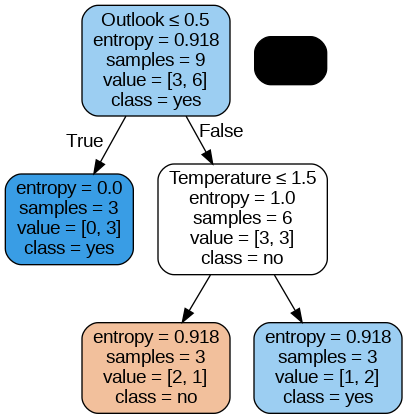

In [205]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names =X.columns ,class_names=['no','yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('playtennis.png')
Image(graph.create_png())

1. Apply random forest, xgboost, catboot algorithm to the play tennis dataset.

# Random Forrest
[Random_F_Case](https://blog.pjjop.org/random-forest/)

In [206]:
from sklearn.ensemble import RandomForestClassifier

In [207]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y,
                                                                test_size=0.4,
                                                                #stratify=y,
                                                                random_state=42)

In [208]:
#Hyperparameter Tuning
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV, train_test_split
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,3)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train_rf, y_train_rf)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x782b9a54b670>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x782b9a54b6d0>})

In [209]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 2, 'n_estimators': 472}


In [210]:
rf = RandomForestClassifier(n_estimators=494, max_depth=2)
rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(max_depth=2, n_estimators=494)

In [211]:
y_pred_rf = rf.predict(X_test_rf)

In [212]:
print("Accuracy:", metrics.accuracy_score(y_test_rf, y_pred_rf))

Accuracy: 0.8333333333333334


In [213]:
# data_p_rf = pd.DataFrame({'Actual':y_test_rf, 'Predicted':y_pred_rf})
# data_p_rf

In [214]:
print(confusion_matrix(y_test_rf, y_pred_rf))
print(classification_report(y_test_rf, y_pred_rf))

[[1 1]
 [0 4]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.80      1.00      0.89         4

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6



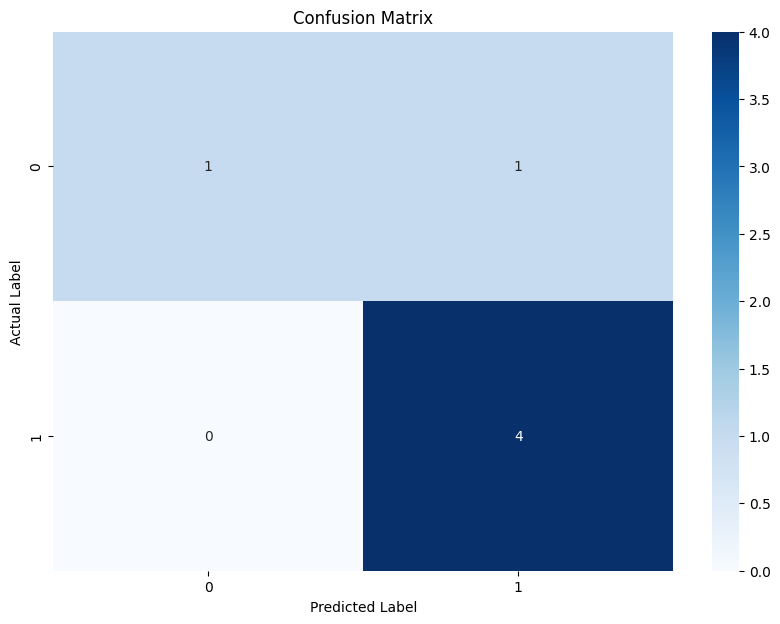

In [215]:
# สร้าง Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test_rf, y_pred_rf)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

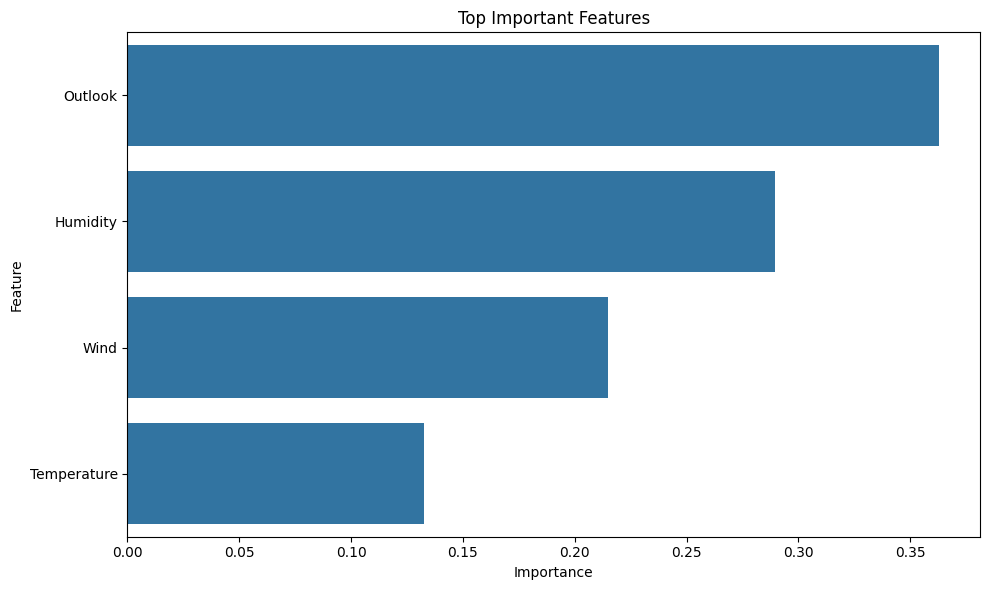

In [216]:
# แสดงความสำคัญของ Feature
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier # Import the RandomForestClassifier

# Create an instance of the RandomForestClassifier
rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train_rf, y_train_rf)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_classifier.feature_importances_})
feature_importance = feature_importance.sort_values('Importance', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Top Important Features')
plt.tight_layout()
plt.show()

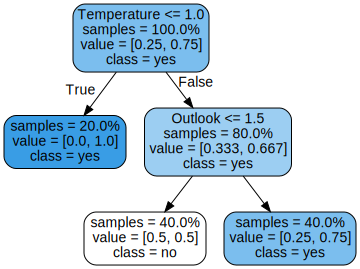

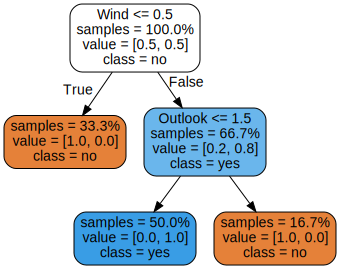

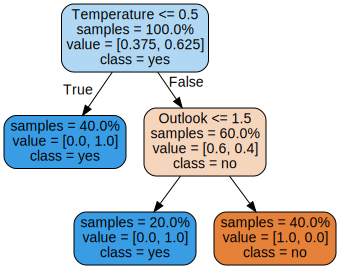

In [217]:
import graphviz
from sklearn.tree import export_graphviz

# Assuming you have X_train, y_train ready
rf.fit(X_train_rf, y_train_rf)  # Fit the RandomForestClassifier first

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X.columns,
                               class_names=['no','yes'],
                               filled=True,
                               rounded=True,
                               max_depth=3,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [218]:
# เปรียบเทียบประสิทธิภาพกับ Decision Tree
# from sklearn.tree import DecisionTreeClassifier

# dt_classifier = DecisionTreeClassifier(random_state=2)
# dt_classifier.fit(X_train, y_train)
# dt_pred = dt_classifier.predict(X_test)

print("\nRandom Forest Accuracy:", accuracy_score(y_test_rf, y_pred_rf))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))


Random Forest Accuracy: 0.8333333333333334
Decision Tree Accuracy: 0.6


#Xgboost
[XGBoost_Tree](https://machinelearningmastery.com/visualize-gradient-boosting-decision-trees-xgboost-python/)

[Best_Parameter_Set](https://medium.com/@thommaskevin/tinyml-xgboost-classifier-795202285779)

[Check_Feature_Importance](https://medium.com/@emilykmarsh/xgboost-feature-importance-233ee27c33a4)

In [219]:
!pip install micromlgen
!pip install xgboost

In [220]:
import xgboost as xgb
from micromlgen import port
from xgboost import plot_tree
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import uniform, randint

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

In [221]:
X_train_xg, X_test_xg, y_train_xg, y_test_xg = train_test_split(X, y,
                                                                test_size=0.2,
                                                                stratify=y,
                                                                random_state=345)

In [222]:
X_test_xg

,Outlook,Temperature,Humidity,Wind
0,2,1,0,1
12,0,1,1,1
8,2,0,1,1


In [223]:
params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.03), # default 0.1
    "max_depth": randint(2, 4), # default 3
    "n_estimators": randint(10, 14), # default 100
    "subsample": uniform(0.6, 0.4)
}


In [224]:
params_2 = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9],  # เพิ่มความลึกของต้นไม้

    'n_estimators': [10, 50, 100, 200, 500],  # เพิ่มจำนวนต้นไม้มากขึ้น

    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],  # เพิ่มตัวเลือก learning rate

    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],  # ค่า regularization

    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],  # สัดส่วนของ features ที่ใช้ในแต่ละต้นไม้

    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],  # สัดส่วนของข้อมูลที่ใช้ในแต่ละต้นไม้

    'min_child_weight': [1, 3, 5, 7],  # ควบคุมการแตกกิ่งของต้นไม้

    'reg_alpha': [0, 0.1, 0.5, 1.0],  # L1 regularization

    'reg_lambda': [0, 0.1, 0.5, 1.0]   # L2 regularization
}

In [225]:
from sklearn.model_selection import RandomizedSearchCV
# Initialize XGBClassifier
xgb_model = XGBClassifier()

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(xgb_model,
                                   param_distributions= params_2 ,
                                   n_iter=100,
                                   scoring=['accuracy', 'f1', 'roc_auc'] ,
                                   refit='accuracy',
                                   cv=5,
                                   verbose=3,
                                   random_state=345)

# Now you can fit the random_search object and find the best model
random_search.fit(X_train_xg, y_train_xg)

# Then assign the best model to 'best_model'
best_model = random_search.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=8, min_child_weight=7, n_estimators=10, reg_alpha=0.5, reg_lambda=0, subsample=0.5; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.0s
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=8, min_child_weight=7, n_estimators=10, reg_alpha=0.5, reg_lambda=0, subsample=0.5; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.0s
[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=8, min_child_weight=7, n_estimators=10, reg_alpha=0.5, reg_lambda=0, subsample=0.5; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=8, min_child_weight=7, n_estimators=10, reg_alpha=0.5, reg_lambda=0, subsample=0.5; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_s


[CV 2/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=10, reg_alpha=1.0, reg_lambda=0.1, subsample=0.6; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.0s
[CV 3/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=10, reg_alpha=1.0, reg_lambda=0.1, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 4/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=10, reg_alpha=1.0, reg_lambda=0.1, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 5/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=10, reg_alpha=1.0, reg_lambda=0.1, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 1/5] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.25, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=0.1, subsample=0.8; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.1s
[CV 2/5] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.25, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=0.1, subsample=0.8; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.1s
[CV 3/5] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.25, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=0.1, subsample=0.8; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 4/5] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.25, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=0.1, subsample=0.8; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.2s
[CV 5/5] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.25, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=0.1, subsample=0.8; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.3s
[CV 1/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=9, min_child_weight=1, n_estimators=50, reg_alpha=0.5, reg_lambda=0.5, subsample=0.6; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.1s
[CV 2/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=9, min_child_weight=1, n_estimators=50, reg_alpha=0.5, reg_lambda=0.5, subsample=0.6; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.1s
[CV 3/5] END colsample_bytree=1.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 4/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=9, min_child_weight=1, n_estimators=50, reg_alpha=0.5, reg_lambda=0.5, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.2s
[CV 5/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=9, min_child_weight=1, n_estimators=50, reg_alpha=0.5, reg_lambda=0.5, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=1.0, reg_lambda=0, subsample=0.7; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=1.0, reg_lambda=0, subsample=0.7; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 3/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=1.0, reg_lambda=0, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=1.0, reg_lambda=0, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.6s
[CV 5/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=1.0, reg_lambda=0, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   1.7s
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=100, reg_alpha=1.0, reg_lambda=0.5, subsample=0.9; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=100, reg_alpha=1.0, reg_lambda=0.5, subsample=0.9; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.3s
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=100, reg_alpha=1.0, reg_lambda=0.5, subsample=0.9; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.3s
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=100, reg_alpha=1.0, reg_lambda=0.5, subsample=0.9; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.3s
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=100, reg_alpha=1.0, reg_lambda=0.5, subsample=0.9; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 1/5] END colsample_byt

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 3/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=0, subsample=0.9; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.2s
[CV 4/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=0, subsample=0.9; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.4s
[CV 5/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=0, subsample=0.9; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 1/5] END colsample_bytree=0.9, gamma=0.3, learning_rate=0.25, max_depth=3, min_child_weight=7, n_estimators=50, reg_alpha=0.1, reg_lambda=0, subsample=1.0; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.1s
[CV 2/5] END colsample_bytree=0.9, gamma=0.3,

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 3/5] END colsample_bytree=0.9, gamma=0.3, learning_rate=0.25, max_depth=3, min_child_weight=7, n_estimators=50, reg_alpha=0.1, reg_lambda=0, subsample=1.0; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 4/5] END colsample_bytree=0.9, gamma=0.3, learning_rate=0.25, max_depth=3, min_child_weight=7, n_estimators=50, reg_alpha=0.1, reg_lambda=0, subsample=1.0; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END colsample_bytree=0.9, gamma=0.3, learning_rate=0.25, max_depth=3, min_child_weight=7, n_estimators=50, reg_alpha=0.1, reg_lambda=0, subsample=1.0; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 1/5] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.1, max_depth=9, min_child_weight=5, n_estimators=500, reg_alpha=0.5, reg_lambda=1.0, subsample=0.6; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 2/5] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.1, max_depth=9, min_child_weight=5, n_estimators=500, reg_alpha=0.5, reg_lambda=1.0, subsample=0.6; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.3s
[CV 3/5] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.1, max_depth=9, min_child_weight=5, n_estimators=500, reg_alpha=0.5, reg_lambda=1.0, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.4s
[CV 4/5] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.1, max_depth=9, min_child_weight=5, n_estimators=500, reg_alpha=0.5, reg_lambda=1.0, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.5s
[CV 5/5] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.1, max_depth=9, min_child_weight=5, n_estimators=500, reg_alpha=0.5, reg_lambda=1.0, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.3s
[CV 1/5] END colsample_bytree=

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 3/5] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=3, n_estimators=10, reg_alpha=0.1, reg_lambda=0.5, subsample=0.5; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 4/5] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=3, n_estimators=10, reg_alpha=0.1, reg_lambda=0.5, subsample=0.5; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=3, n_estimators=10, reg_alpha=0.1, reg_lambda=0.5, subsample=0.5; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 1/5] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=10, reg_alpha=0, reg_lambda=0, subsample=0.6; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.1s
[CV 2/5] END colsample_bytree=0.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 3/5] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=10, reg_alpha=0, reg_lambda=0, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.2s
[CV 4/5] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=10, reg_alpha=0, reg_lambda=0, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=10, reg_alpha=0, reg_lambda=0, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.3s
[CV 1/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, reg_alpha=0.5, reg_lambda=0.1, subsample=0.6; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 2/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, reg_alpha=0.5, reg_lambda=0.1, subsample=0.6; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.3s
[CV 3/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, reg_alpha=0.5, reg_lambda=0.1, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.4s
[CV 4/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, reg_alpha=0.5, reg_lambda=0.1, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.8s
[CV 5/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, reg_alpha=0.5, reg_lambda=0.1, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.3s
[CV 1/5] END colsample_bytree=0.6,

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 3/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=9, min_child_weight=7, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 4/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=9, min_child_weight=7, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=9, min_child_weight=7, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   2.2s
[CV 1/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=1.0, reg_lambda=0.1, subsample=0.7; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 2/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=1.0, reg_lambda=0.1, subsample=0.7; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   1.3s
[CV 3/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=1.0, reg_lambda=0.1, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   1.1s
[CV 4/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=1.0, reg_lambda=0.1, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.2s
[CV 5/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=1.0, reg_lambda=0.1, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.5s
[CV 1/5] END colsample_bytree=

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 2/5] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=200, reg_alpha=1.0, reg_lambda=0, subsample=0.6; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.3s
[CV 3/5] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=200, reg_alpha=1.0, reg_lambda=0, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.2s
[CV 4/5] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=200, reg_alpha=1.0, reg_lambda=0, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.2s
[CV 5/5] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=200, reg_alpha=1.0, reg_lambda=0, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.2s
[CV 1/5] END colsample_bytree=0.5,

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=50, reg_alpha=0.5, reg_lambda=0.1, subsample=0.5; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.4s
[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=50, reg_alpha=0.5, reg_lambda=0.1, subsample=0.5; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=50, reg_alpha=0.5, reg_lambda=0.1, subsample=0.5; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.4s
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=50, reg_alpha=0.5, reg_lambda=0.1, subsample=0.5; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.3s
[CV 1/5] END colsample_bytree=0.7,

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 2/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.25, max_depth=5, min_child_weight=5, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5, subsample=0.7; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   2.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.25, max_depth=5, min_child_weight=5, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.3s
[CV 4/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.25, max_depth=5, min_child_weight=5, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   1.2s
[CV 5/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.25, max_depth=5, min_child_weight=5, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.4s
[CV 1/5] END colsample_byt

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=50, reg_alpha=0.5, reg_lambda=0, subsample=0.8; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=50, reg_alpha=0.5, reg_lambda=0, subsample=0.8; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=50, reg_alpha=0.5, reg_lambda=0, subsample=0.8; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=50, reg_alpha=0.5, reg_lambda=0, subsample=0.8; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 1/5] END colsample_bytree=0.6, gamma=0

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 2/5] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=10, reg_alpha=0.1, reg_lambda=1.0, subsample=0.7; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.1s
[CV 3/5] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=10, reg_alpha=0.1, reg_lambda=1.0, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 4/5] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=10, reg_alpha=0.1, reg_lambda=1.0, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 5/5] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=10, reg_alpha=0.1, reg_lambda=1.0, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 1/5] END colsample_bytree=

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=10, reg_alpha=0.1, reg_lambda=0, subsample=0.5; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=10, reg_alpha=0.1, reg_lambda=0, subsample=0.5; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.5s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=10, reg_alpha=0.1, reg_lambda=0, subsample=0.5; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.4s
[CV 1/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=0.1, reg_lambda=0.1, subsample=0.7; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 2/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=0.1, reg_lambda=0.1, subsample=0.7; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   1.3s
[CV 3/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=0.1, reg_lambda=0.1, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.3s
[CV 4/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=0.1, reg_lambda=0.1, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.3s
[CV 5/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=0.1, reg_lambda=0.1, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.4s
[CV 1/5] END colsample_bytree=

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 2/5] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=1.0, reg_lambda=0.1, subsample=0.5; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.2s
[CV 3/5] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=1.0, reg_lambda=0.1, subsample=0.5; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.5s
[CV 4/5] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=1.0, reg_lambda=0.1, subsample=0.5; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.2s
[CV 5/5] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, reg_alpha=1.0, reg_lambda=0.1, subsample=0.5; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.3s
[CV 1/5] END colsample_bytree=1.0,

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 2/5] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.3, max_depth=4, min_child_weight=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.3s
[CV 3/5] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.3, max_depth=4, min_child_weight=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   1.6s
[CV 4/5] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.3, max_depth=4, min_child_weight=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.2s
[CV 5/5] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.3, max_depth=4, min_child_weight=7, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 1/5] END colsample_bytree=

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 4/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=10, reg_alpha=1.0, reg_lambda=0.1, subsample=1.0; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=10, reg_alpha=1.0, reg_lambda=0.1, subsample=1.0; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.3s
[CV 1/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.25, max_depth=7, min_child_weight=7, n_estimators=100, reg_alpha=0, reg_lambda=0.5, subsample=0.6; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.2s
[CV 2/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.25, max_depth=7, min_child_weight=7, n_estimators=100, reg_alpha=0, reg_lambda=0.5, subsample=0.6; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.1s
[CV 3/5] END colsample_bytree=0.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 4/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.25, max_depth=7, min_child_weight=7, n_estimators=100, reg_alpha=0, reg_lambda=0.5, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.25, max_depth=7, min_child_weight=7, n_estimators=100, reg_alpha=0, reg_lambda=0.5, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5, subsample=1.0; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5, subsample=1.0; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5, subsample=1.0; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.7s
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5, subsample=1.0; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.5s
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5, subsample=1.0; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.5s
[CV 1/5] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=7, n_estimators=200, reg_alpha=0, reg_lambda=0, subsample=1.0; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 2/5] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=7, n_estimators=200, reg_alpha=0, reg_lambda=0, subsample=1.0; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.4s
[CV 3/5] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=7, n_estimators=200, reg_alpha=0, reg_lambda=0, subsample=1.0; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.2s
[CV 4/5] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=7, n_estimators=200, reg_alpha=0, reg_lambda=0, subsample=1.0; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.4s
[CV 5/5] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=7, n_estimators=200, reg_alpha=0, reg_lambda=0, subsample=1.0; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.2s
[CV 1/5] END colsample_bytree=0.8, gamma=0.5, 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 3/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=50, reg_alpha=0, reg_lambda=1.0, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=50, reg_alpha=0, reg_lambda=1.0, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=50, reg_alpha=0, reg_lambda=1.0, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.8s
[CV 1/5] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.8; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 2/5] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.8; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.4s
[CV 3/5] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.8; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 4/5] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.8; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.8; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, gamma=0.4, 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 2/5] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.25, max_depth=8, min_child_weight=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.25, max_depth=8, min_child_weight=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.25, max_depth=8, min_child_weight=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.25, max_depth=8, min_child_weight=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 1/5] END colsample_bytree=

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 4/5] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.25, max_depth=8, min_child_weight=1, n_estimators=50, reg_alpha=0.1, reg_lambda=0.5, subsample=0.5; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.25, max_depth=8, min_child_weight=1, n_estimators=50, reg_alpha=0.1, reg_lambda=0.5, subsample=0.5; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 1/5] END colsample_bytree=0.9, gamma=0.3, learning_rate=0.15, max_depth=4, min_child_weight=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0, subsample=1.0; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 2/5] END colsample_bytree=0.9, gamma=0.3, learning_rate=0.15, max_depth=4, min_child_weight=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0, subsample=1.0; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.1s
[CV 3/5] END colsample_bytree=0.9, gamma=0.3, learning_rate=0.15, max_depth=4, min_child_weight=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0, subsample=1.0; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 4/5] END colsample_bytree=0.9, gamma=0.3, learning_rate=0.15, max_depth=4, min_child_weight=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0, subsample=1.0; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END colsample_bytree=0.9, gamma=0.3, learning_rate=0.15, max_depth=4, min_child_weight=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0, subsample=1.0; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 1/5] END colsample_bytree=0.9,

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 3/5] END colsample_bytree=0.9, gamma=0.4, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=10, reg_alpha=0, reg_lambda=0.1, subsample=1.0; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 4/5] END colsample_bytree=0.9, gamma=0.4, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=10, reg_alpha=0, reg_lambda=0.1, subsample=1.0; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END colsample_bytree=0.9, gamma=0.4, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=10, reg_alpha=0, reg_lambda=0.1, subsample=1.0; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5, subsample=0.9; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.4s
[CV 2/5] END colsample_bytree=0.7, g

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5, subsample=0.9; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5, subsample=0.9; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 1/5] END colsample_bytree=0.9, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=1.0, reg_lambda=0, subsample=0.5; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 2/5] END colsample_bytree=0.9, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=1.0, reg_lambda=0, subsample=0.5; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.1s
[CV 3/5] END colsample_bytree=0.9, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=1.0, reg_lambda=0, subsample=0.5; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 4/5] END colsample_bytree=0.9, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=1.0, reg_lambda=0, subsample=0.5; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END colsample_bytree=0.9, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=1.0, reg_lambda=0, subsample=0.5; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 1/5] END colsample_bytree=0.9, gamma=0.2, 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 2/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=10, reg_alpha=0, reg_lambda=0, subsample=0.8; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=10, reg_alpha=0, reg_lambda=0, subsample=0.8; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=10, reg_alpha=0, reg_lambda=0, subsample=0.8; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=10, reg_alpha=0, reg_lambda=0, subsample=0.8; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5, subsample=0.7; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 1/5] END colsample_bytree=

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 2/5] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=7, n_estimators=50, reg_alpha=0.5, reg_lambda=0, subsample=0.7; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.0s
[CV 3/5] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=7, n_estimators=50, reg_alpha=0.5, reg_lambda=0, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 4/5] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=7, n_estimators=50, reg_alpha=0.5, reg_lambda=0, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 5/5] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=7, n_estimators=50, reg_alpha=0.5, reg_lambda=0, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 1/5] END colsample_bytree=0.6, gamma=0

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 2/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.25, max_depth=6, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5, subsample=0.8; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.1s
[CV 3/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.25, max_depth=6, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5, subsample=0.8; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 4/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.25, max_depth=6, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5, subsample=0.8; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.25, max_depth=6, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5, subsample=0.8; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 1/5] END colsample_bytree=1.0,

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 5/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, reg_alpha=1.0, reg_lambda=0.5, subsample=0.9; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, reg_alpha=0.1, reg_lambda=0, subsample=0.9; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, reg_alpha=0.1, reg_lambda=0, subsample=0.9; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, reg_alpha=0.1, reg_lambda=0, subsample=0.9; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 4/5] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, reg_alpha=0.1, reg_lambda=0, subsample=0.9; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, reg_alpha=0.1, reg_lambda=0, subsample=0.9; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=50, reg_alpha=0.1, reg_lambda=0.5, subsample=0.6; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=50, reg_alpha=0.1, reg_lambda=0.5, subsample=0.6; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, g

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 5/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=50, reg_alpha=0.1, reg_lambda=0.5, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=50, reg_alpha=0.5, reg_lambda=0.1, subsample=0.9; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.0s
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=50, reg_alpha=0.5, reg_lambda=0.1, subsample=0.9; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.0s
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=50, reg_alpha=0.5, reg_lambda=0.1, subsample=0.9; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 4/5] END colsample_bytree=0.5,

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 5/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=0, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=500, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=500, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=500, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=500, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=500, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 1/5] END colsample_bytree=0.9, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0, subsample=0.7; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.1s
[CV 2/5] END colsample_bytree=0

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 1/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=500, reg_alpha=1.0, reg_lambda=0, subsample=0.9; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=500, reg_alpha=1.0, reg_lambda=0, subsample=0.9; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=500, reg_alpha=1.0, reg_lambda=0, subsample=0.9; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 4/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=500, reg_alpha=1.0, reg_lambda=0, subsample=0.9; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=500, reg_alpha=1.0, reg_lambda=0, subsample=0.9; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.3, max_depth=9, min_child_weight=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.1, subsample=0.5; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.3, max_depth=9, min_child_weight=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.1, subsample=0.5; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 3/5] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.3, max_depth=9, min_child_weight=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.1, subsample=0.5; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.3, max_depth=9, min_child_weight=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.1, subsample=0.5; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.3, max_depth=9, min_child_weight=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.1, subsample=0.5; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=9, min_child_weight=1, n_estimators=50, reg_alpha=0.1, reg_lambda=1.0, subsample=0.9; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.0s
[CV 2/5] END colsample_bytree=0

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 3/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=9, min_child_weight=1, n_estimators=50, reg_alpha=0.1, reg_lambda=1.0, subsample=0.9; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=9, min_child_weight=1, n_estimators=50, reg_alpha=0.1, reg_lambda=1.0, subsample=0.9; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=9, min_child_weight=1, n_estimators=50, reg_alpha=0.1, reg_lambda=1.0, subsample=0.9; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, ga

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 3/5] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 4/5] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1.0, subsample=0.7; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 2/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1.0, subsample=0.7; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1.0, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1.0, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=50, reg_alpha=0.1, reg_lambda=1.0, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 1/5] END colsample_bytree=

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 2/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=9, min_child_weight=7, n_estimators=200, reg_alpha=0.5, reg_lambda=0, subsample=0.7; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=9, min_child_weight=7, n_estimators=200, reg_alpha=0.5, reg_lambda=0, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=9, min_child_weight=7, n_estimators=200, reg_alpha=0.5, reg_lambda=0, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=9, min_child_weight=7, n_estimators=200, reg_alpha=0.5, reg_lambda=0, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=0

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 4/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.2, max_depth=4, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=0, subsample=0.8; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.2, max_depth=4, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=0, subsample=0.8; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 1/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=4, min_child_weight=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0, subsample=0.5; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.1s
[CV 2/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=4, min_child_weight=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0, subsample=0.5; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 3/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=4, min_child_weight=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0, subsample=0.5; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=4, min_child_weight=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0, subsample=0.5; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 5/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=4, min_child_weight=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0, subsample=0.5; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 1/5] END colsample_bytree=0.9, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=10, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.0s
[CV 2/5] END colsample_bytree=0

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 1/5] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.1, subsample=0.9; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.1s
[CV 2/5] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.1, subsample=0.9; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.1s
[CV 3/5] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.1, subsample=0.9; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 4/5] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.1, subsample=0.9; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.1, subsample=0.9; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 1/5] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5, subsample=0.7; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 2/5] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5, subsample=0.7; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.1s
[CV 3/5] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 4/5] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 5/5] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 1/5] END colsample_bytree=1.0,

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 4/5] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=7, n_estimators=500, reg_alpha=0.5, reg_lambda=0.1, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=7, n_estimators=500, reg_alpha=0.5, reg_lambda=0.1, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.25, max_depth=3, min_child_weight=1, n_estimators=200, reg_alpha=1.0, reg_lambda=1.0, subsample=0.6; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.25, max_depth=3, min_child_weight=1, n_estimators=200, reg_alpha=1.0, reg_lambda=1.0, subsample=0.6; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 3/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.25, max_depth=3, min_child_weight=1, n_estimators=200, reg_alpha=1.0, reg_lambda=1.0, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.25, max_depth=3, min_child_weight=1, n_estimators=200, reg_alpha=1.0, reg_lambda=1.0, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.25, max_depth=3, min_child_weight=1, n_estimators=200, reg_alpha=1.0, reg_lambda=1.0, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=200, reg_alpha=1.0, reg_lambda=0.5, subsample=0.7; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 2/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=200, reg_alpha=1.0, reg_lambda=0.5, subsample=0.7; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.1s
[CV 3/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=200, reg_alpha=1.0, reg_lambda=0.5, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=200, reg_alpha=1.0, reg_lambda=0.5, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 5/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=200, reg_alpha=1.0, reg_lambda=0.5, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 1/5] END colsample_bytree=

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 3/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.4s
[CV 4/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.6s
[CV 5/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.4s
[CV 1/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.25, max_depth=6, min_child_weight=3, n_estimators=10, reg_alpha=0.1, reg_lambda=0.1, subsample=0.5; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 2/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.25, max_depth=6, min_child_weight=3, n_estimators=10, reg_alpha=0.1, reg_lambda=0.1, subsample=0.5; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.2s
[CV 3/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.25, max_depth=6, min_child_weight=3, n_estimators=10, reg_alpha=0.1, reg_lambda=0.1, subsample=0.5; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 4/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.25, max_depth=6, min_child_weight=3, n_estimators=10, reg_alpha=0.1, reg_lambda=0.1, subsample=0.5; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.25, max_depth=6, min_child_weight=3, n_estimators=10, reg_alpha=0.1, reg_lambda=0.1, subsample=0.5; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 1/5] END colsample_bytree=

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 3/5] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.2s
[CV 4/5] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 1/5] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.3, max_depth=9, min_child_weight=3, n_estimators=200, reg_alpha=1.0, reg_lambda=0.5, subsample=0.9; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 2/5] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.3, max_depth=9, min_child_weight=3, n_estimators=200, reg_alpha=1.0, reg_lambda=0.5, subsample=0.9; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.3s
[CV 3/5] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.3, max_depth=9, min_child_weight=3, n_estimators=200, reg_alpha=1.0, reg_lambda=0.5, subsample=0.9; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.3, max_depth=9, min_child_weight=3, n_estimators=200, reg_alpha=1.0, reg_lambda=0.5, subsample=0.9; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 5/5] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.3, max_depth=9, min_child_weight=3, n_estimators=200, reg_alpha=1.0, reg_lambda=0.5, subsample=0.9; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 1/5] END colsample_bytree=

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 2/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=100, reg_alpha=1.0, reg_lambda=1.0, subsample=0.7; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=100, reg_alpha=1.0, reg_lambda=1.0, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 4/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=100, reg_alpha=1.0, reg_lambda=1.0, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 5/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=100, reg_alpha=1.0, reg_lambda=1.0, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 1/5] END colsample_bytree=

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=1.0, reg_lambda=0.5, subsample=0.9; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=1.0, reg_lambda=0.5, subsample=0.9; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=1.0, reg_lambda=0.5, subsample=0.9; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=1.0, reg_lambda=0.5, subsample=0.9; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 1/5] END colsample_bytree=

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 3/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.25, max_depth=9, min_child_weight=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5, subsample=0.9; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 4/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.25, max_depth=9, min_child_weight=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5, subsample=0.9; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.25, max_depth=9, min_child_weight=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5, subsample=0.9; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1.0, subsample=0.7; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.0s
[CV 2/5] END colsample_byt

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 2/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.3, max_depth=8, min_child_weight=3, n_estimators=10, reg_alpha=0.1, reg_lambda=0.1, subsample=0.9; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.0s
[CV 3/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.3, max_depth=8, min_child_weight=3, n_estimators=10, reg_alpha=0.1, reg_lambda=0.1, subsample=0.9; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 4/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.3, max_depth=8, min_child_weight=3, n_estimators=10, reg_alpha=0.1, reg_lambda=0.1, subsample=0.9; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 5/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.3, max_depth=8, min_child_weight=3, n_estimators=10, reg_alpha=0.1, reg_lambda=0.1, subsample=0.9; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 1/5] END colsample_bytree=1.0,

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 4/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=50, reg_alpha=0.1, reg_lambda=0, subsample=0.5; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 5/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=1, n_estimators=50, reg_alpha=0.1, reg_lambda=0, subsample=0.5; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 1/5] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=200, reg_alpha=0.5, reg_lambda=1.0, subsample=0.7; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.0s
[CV 2/5] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=200, reg_alpha=0.5, reg_lambda=1.0, subsample=0.7; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 3/5] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=200, reg_alpha=0.5, reg_lambda=1.0, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 4/5] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=200, reg_alpha=0.5, reg_lambda=1.0, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 5/5] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=200, reg_alpha=0.5, reg_lambda=1.0, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=100, reg_alpha=1.0, reg_lambda=0, subsample=0.6; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.0s
[CV 2/5] END colsample_bytree

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 3/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=100, reg_alpha=1.0, reg_lambda=0, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=100, reg_alpha=1.0, reg_lambda=0, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=100, reg_alpha=1.0, reg_lambda=0, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 1/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=10, reg_alpha=0, reg_lambda=0.1, subsample=0.7; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.0s
[CV 2/5] END colsample_bytree=0.5, 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.3, max_depth=6, min_child_weight=7, n_estimators=50, reg_alpha=0.1, reg_lambda=0, subsample=0.9; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 1/5] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.7; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.0s
[CV 2/5] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.7; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.0s
[CV 3/5] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 4/5] END colsample_bytree=0.6, g

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 1/5] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.15, max_depth=3, min_child_weight=7, n_estimators=50, reg_alpha=1.0, reg_lambda=0.5, subsample=0.6; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.15, max_depth=3, min_child_weight=7, n_estimators=50, reg_alpha=1.0, reg_lambda=0.5, subsample=0.6; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.0s
[CV 3/5] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.15, max_depth=3, min_child_weight=7, n_estimators=50, reg_alpha=1.0, reg_lambda=0.5, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.15, max_depth=3, min_child_weight=7, n_estimators=50, reg_alpha=1.0, reg_lambda=0.5, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 5/5] END colsample_bytree=

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 3/5] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=10, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=10, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=10, reg_alpha=0.1, reg_lambda=1.0, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 1/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.15, max_depth=5, min_child_weight=7, n_estimators=100, reg_alpha=1.0, reg_lambda=0, subsample=0.7; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.0s
[CV 2/5] END colsample_bytree

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 4/5] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=50, reg_alpha=0.1, reg_lambda=0.5, subsample=0.9; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 5/5] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=50, reg_alpha=0.1, reg_lambda=0.5, subsample=0.9; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=4, min_child_weight=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.1, subsample=0.7; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=4, min_child_weight=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.1, subsample=0.7; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=4, min_child_weight=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.1, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=4, min_child_weight=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.1, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=4, min_child_weight=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.1, subsample=0.7; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 1/5] END colsample_byt

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 5/5] END colsample_bytree=0.9, gamma=0, learning_rate=0.15, max_depth=8, min_child_weight=5, n_estimators=100, reg_alpha=0.5, reg_lambda=0.1, subsample=0.5; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 1/5] END colsample_bytree=0.9, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0, subsample=1.0; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.0s
[CV 2/5] END colsample_bytree=0.9, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0, subsample=1.0; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.0s
[CV 3/5] END colsample_bytree=0.9, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0, subsample=1.0; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 4/5] END colsample_bytree=0.9, ga

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 5/5] END colsample_bytree=0.9, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0, subsample=1.0; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 1/5] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.1, subsample=0.6; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.0s
[CV 2/5] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.1, subsample=0.6; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.0s
[CV 3/5] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.1, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 4/5] END colsample_bytree

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 5/5] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.1, subsample=0.6; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.25, max_depth=8, min_child_weight=7, n_estimators=200, reg_alpha=1.0, reg_lambda=0.5, subsample=0.8; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.25, max_depth=8, min_child_weight=7, n_estimators=200, reg_alpha=1.0, reg_lambda=0.5, subsample=0.8; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.1s
[CV 3/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.25, max_depth=8, min_child_weight=7, n_estimators=200, reg_alpha=1.0, reg_lambda=0.5, subsample=0.8; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 4/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.25, max_depth=8, min_child_weight=7, n_estimators=200, reg_alpha=1.0, reg_lambda=0.5, subsample=0.8; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.25, max_depth=8, min_child_weight=7, n_estimators=200, reg_alpha=1.0, reg_lambda=0.5, subsample=0.8; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 1/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.25, max_depth=8, min_child_weight=5, n_estimators=200, reg_alpha=1.0, reg_lambda=0, subsample=0.5; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.1s
[CV 2/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.25, max_depth=8, min_child_weight=5, n_estimators=200, reg_alpha=1.0, reg_lambda=0, subsample=0.5; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 3/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.25, max_depth=8, min_child_weight=5, n_estimators=200, reg_alpha=1.0, reg_lambda=0, subsample=0.5; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 4/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.25, max_depth=8, min_child_weight=5, n_estimators=200, reg_alpha=1.0, reg_lambda=0, subsample=0.5; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 5/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.25, max_depth=8, min_child_weight=5, n_estimators=200, reg_alpha=1.0, reg_lambda=0, subsample=0.5; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=7, min_child_weight=7, n_estimators=10, reg_alpha=0.5, reg_lambda=0.1, subsample=0.5; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.0s
[CV 2/5] END colsample_bytree=0

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=7, min_child_weight=7, n_estimators=10, reg_alpha=0.5, reg_lambda=0.1, subsample=0.5; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=7, min_child_weight=7, n_estimators=10, reg_alpha=0.5, reg_lambda=0.1, subsample=0.5; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=7, min_child_weight=7, n_estimators=10, reg_alpha=0.5, reg_lambda=0.1, subsample=0.5; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=0, learning_rate=0.25, max_depth=7, min_child_weight=5, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5, subsample=0.6; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.0s
[CV 2/5] END colsample_bytree

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 4/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.1, subsample=0.5; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.1, subsample=0.5; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.2, max_depth=9, min_child_weight=7, n_estimators=500, reg_alpha=0.5, reg_lambda=1.0, subsample=1.0; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 2/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.2, max_depth=9, min_child_weight=7, n_estimators=500, reg_alpha=0.5, reg_lambda=1.0, subsample=1.0; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.2, max_depth=9, min_child_weight=7, n_estimators=500, reg_alpha=0.5, reg_lambda=1.0, subsample=1.0; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.2, max_depth=9, min_child_weight=7, n_estimators=500, reg_alpha=0.5, reg_lambda=1.0, subsample=1.0; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.2, max_depth=9, min_child_weight=7, n_estimators=500, reg_alpha=0.5, reg_lambda=1.0, subsample=1.0; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, gam

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=7, min_child_weight=7, n_estimators=500, reg_alpha=0.5, reg_lambda=1.0, subsample=0.8; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=7, min_child_weight=7, n_estimators=500, reg_alpha=0.5, reg_lambda=1.0, subsample=0.8; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=7, min_child_weight=7, n_estimators=500, reg_alpha=0.5, reg_lambda=1.0, subsample=0.8; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=7, min_child_weight=7, n_estimators=500, reg_alpha=0.5, reg_lambda=1.0, subsample=0.8; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=7, min_child_weight=7, n_estimators=500, reg_alpha=0.5, reg_lambda=1.0, subsample=0.8; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=9, min_child_weight=7, n_estimators=10, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=9, min_child_weight=7, n_estimators=10, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.0s
[CV 3/5] END colsample_bytree=

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 4/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=9, min_child_weight=7, n_estimators=10, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=9, min_child_weight=7, n_estimators=10, reg_alpha=0.1, reg_lambda=1.0, subsample=1.0; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.15, max_depth=9, min_child_weight=7, n_estimators=10, reg_alpha=1.0, reg_lambda=0.1, subsample=0.8; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.15, max_depth=9, min_child_weight=7, n_estimators=10, reg_alpha=1.0, reg_lambda=0.1, subsample=0.8; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.0s
[CV 3/5] END colsample_bytree=

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 1/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.1, reg_lambda=0.5, subsample=0.5; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.1s
[CV 2/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.1, reg_lambda=0.5, subsample=0.5; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.1s
[CV 3/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.1, reg_lambda=0.5, subsample=0.5; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

[CV 4/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.1, reg_lambda=0.5, subsample=0.5; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.1, reg_lambda=0.5, subsample=0.5; accuracy: (test=0.500) f1: (test=0.667) roc_auc: (test=0.500) total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1.0, subsample=0.5; accuracy: (test=0.667) f1: (test=0.800) roc_auc: (test=0.500) total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1.0, subsample=0.5; accuracy: (test=1.000) f1: (test=1.000) roc_auc: (test=nan) total time=   0.0s
[CV 3/5] END colsample_bytree=

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 640, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 76, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  Fil

In [226]:
best_model.fit(X_train_xg, y_train_xg, eval_set=[(X_test_xg, y_test_xg)])

[0]	validation_0-logloss:0.63898
[1]	validation_0-logloss:0.63898
[2]	validation_0-logloss:0.63898
[3]	validation_0-logloss:0.63898
[4]	validation_0-logloss:0.63898
[5]	validation_0-logloss:0.63898
[6]	validation_0-logloss:0.63898
[7]	validation_0-logloss:0.63898
[8]	validation_0-logloss:0.63898
[9]	validation_0-logloss:0.63898


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [227]:
def report_best_scores(results, n_top=1, metric='f1'):
    for i in range(1, n_top + 1):
        rank_key = f'rank_test_{metric}'
        candidates = np.flatnonzero(results[rank_key] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            mean_key = f'mean_test_{metric}'
            std_key = f'std_test_{metric}'
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                results[mean_key][candidate],
                results[std_key][candidate]))
            best_params = results['params'][candidate]
            print("Best parameters found:")
            for param, value in best_params.items():
                print("  {0}: {1}".format(param, value))
            print("")

In [228]:
report_best_scores(random_search.cv_results_, 1)

Model with rank: 1
Mean validation score: 0.760 (std: 0.131)
Best parameters found:
  subsample: 0.5
  reg_lambda: 0
  reg_alpha: 0.5
  n_estimators: 10
  min_child_weight: 7
  max_depth: 8
  learning_rate: 0.25
  gamma: 0.4
  colsample_bytree: 0.5

Model with rank: 1
Mean validation score: 0.760 (std: 0.131)
Best parameters found:
  subsample: 0.6
  reg_lambda: 0.1
  reg_alpha: 1.0
  n_estimators: 10
  min_child_weight: 1
  max_depth: 4
  learning_rate: 0.05
  gamma: 0.1
  colsample_bytree: 0.6

Model with rank: 1
Mean validation score: 0.760 (std: 0.131)
Best parameters found:
  subsample: 0.8
  reg_lambda: 0.1
  reg_alpha: 0
  n_estimators: 500
  min_child_weight: 1
  max_depth: 5
  learning_rate: 0.25
  gamma: 0.1
  colsample_bytree: 0.9

Model with rank: 1
Mean validation score: 0.760 (std: 0.131)
Best parameters found:
  subsample: 0.6
  reg_lambda: 0.5
  reg_alpha: 0.5
  n_estimators: 50
  min_child_weight: 1
  max_depth: 9
  learning_rate: 0.05
  gamma: 0.3
  colsample_bytree: 

In [229]:
#bst = XGBClassifier(n_estimators=2, max_depth=4, learning_rate=0.2, objective='binary:logistic')

In [230]:
bst = XGBClassifier(
    max_depth=8,              # เพิ่มความลึกให้มากพอที่จะแสดง features ทั้งหมด
    min_child_weight=1,       # ลดลงเพื่อให้แตกกิ่งง่ายขึ้น
    gamma=0,                  # ลด gamma ให้เป็น 0 เพื่อให้แตกกิ่งง่ายขึ้น
    learning_rate=0.25,
    n_estimators=10,
    objective='binary:logistic',
    tree_method='exact',      # ใช้ exact tree method
    grow_policy='depthwise'   # บังคับให้โตตาม depth
)

In [231]:
bst.fit(X_train_xg, y_train_xg)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy='depthwise', importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy: 0.6666666666666666


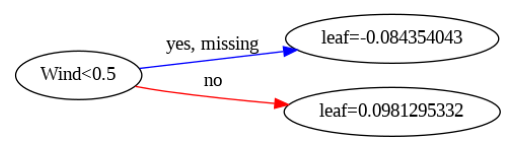

<Figure size 1500x1000 with 0 Axes>

In [232]:
preds = bst.predict(X_test_xg)

# Calculate and print the accuracy
print(f"Accuracy: {accuracy_score(y_test_xg, preds)}")

# **Change:** Pass max_depth within graph_attrs
plot_tree(bst, num_trees=1, rankdir='LR')
plt.figure(figsize=(15,10))
plt.show()

In [233]:
importance = pd.DataFrame({
    'feature': X_train_xg.columns,  # Use the columns from the training data used for the model
    'importance': bst.feature_importances_
}).sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(importance)


Feature Importance:
       feature  importance
3         Wind    0.506052
2     Humidity    0.493948
0      Outlook    0.000000
1  Temperature    0.000000


#Catboost

[Catboost_Medium](https://medium.com/@pwrxndr/catboost-classifier-a-simple-guide-for-everyone-48a2e3897251)

[Catboost_Medium_TH](https://medium.com/@pattayapon1311/%E0%B8%A1%E0%B8%B2%E0%B8%A3%E0%B8%B9%E0%B9%89%E0%B8%88%E0%B8%B1%E0%B8%81-catboost-%E0%B8%AD%E0%B8%B1%E0%B8%A5%E0%B8%81%E0%B8%AD%E0%B8%A3%E0%B8%B6%E0%B8%97%E0%B8%B6%E0%B8%A1%E0%B8%A2%E0%B8%AD%E0%B8%94%E0%B8%99%E0%B8%B4%E0%B8%A2%E0%B8%A1%E0%B9%83%E0%B8%99-kaggle-938a1dd8d643)

[Cat_Plot_Tree](https://catboost.ai/en/docs/concepts/python-reference_catboost_plot_tree)

In [234]:
!pip install catboost

In [235]:
import pandas as pd
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

In [236]:
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X, y, test_size=0.3, random_state=42)

In [237]:
# Parameter distribution
catboost_param_dist = {
    'depth': randint(4, 10),
    'learning_rate': uniform(0.01, 0.3),
    'iterations': randint(10, 1000),
    'l2_leaf_reg': randint(1, 10),
    'border_count': randint(1, 255),
    'bagging_temperature': uniform(0.0, 1.0),
    'random_strength': uniform(0.0, 1.0)
}

In [238]:
# Initialize CatBoost Classifier
CB = CatBoostClassifier()
# Setup RandomizedSearchCV
random_search_cb = RandomizedSearchCV(estimator=CB,
                                      param_distributions=catboost_param_dist,
                                      cv=5,
                                      verbose=2,
                                      random_state=42)
# Fit the model
random_search_cb.fit(X_train_cat, y_train_cat)
# Evaluate the model
random_search_cb_score = random_search_cb.score(X_test_cat, y_test_cat)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 0.6904479	total: 229us	remaining: 18.4ms
1:	learn: 0.6877586	total: 816us	remaining: 32.3ms
2:	learn: 0.6850894	total: 1.21ms	remaining: 31.4ms
3:	learn: 0.6824276	total: 1.33ms	remaining: 25.7ms
4:	learn: 0.6797896	total: 1.46ms	remaining: 22.2ms
5:	learn: 0.6753931	total: 1.55ms	remaining: 19.4ms
6:	learn: 0.6727893	total: 1.67ms	remaining: 17.6ms
7:	learn: 0.6701954	total: 1.78ms	remaining: 16.3ms
8:	learn: 0.6676159	total: 1.93ms	remaining: 15.5ms
9:	learn: 0.6650504	total: 2.06ms	remaining: 14.6ms
10:	learn: 0.6624993	total: 2.17ms	remaining: 13.8ms
11:	learn: 0.6599628	total: 2.29ms	remaining: 13.1ms
12:	learn: 0.6574380	total: 2.39ms	remaining: 12.5ms
13:	learn: 0.6549257	total: 2.5ms	remaining: 12ms
14:	learn: 0.6524304	total: 2.62ms	remaining: 11.5ms
15:	learn: 0.6499490	total: 2.75ms	remaining: 11.2ms
16:	learn: 0.6474781	total: 2.89ms	remaining: 10.9ms
17:	learn: 0.6450166	total: 3.03ms	remaining: 10.6ms


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
218:	learn: 0.0049863	total: 263ms	remaining: 680ms
219:	learn: 0.0049635	total: 264ms	remaining: 677ms
220:	learn: 0.0049405	total: 264ms	remaining: 675ms
221:	learn: 0.0049181	total: 269ms	remaining: 683ms
222:	learn: 0.0048955	total: 270ms	remaining: 680ms
223:	learn: 0.0048729	total: 271ms	remaining: 679ms
224:	learn: 0.0048508	total: 272ms	remaining: 676ms
225:	learn: 0.0048289	total: 272ms	remaining: 673ms
226:	learn: 0.0048069	total: 273ms	remaining: 671ms
227:	learn: 0.0047853	total: 274ms	remaining: 668ms
228:	learn: 0.0047635	total: 274ms	remaining: 666ms
229:	learn: 0.0047436	total: 275ms	remaining: 663ms
230:	learn: 0.0047225	total: 275ms	remaining: 660ms
231:	learn: 0.0047011	total: 276ms	remaining: 658ms
232:	learn: 0.0046802	total: 277ms	remaining: 655ms
233:	learn: 0.0046613	total: 277ms	remaining: 653ms
234:	learn: 0.0046407	total: 280ms	remaining: 656ms
235:	learn: 0.0046199	total: 281ms	remaining: 654ms
236:	learn: 0

In [239]:
# 1. ดู Best Parameters
print("Best Parameters:")
print(random_search_cb.best_params_)

# # 2. ดู Best Score จาก Cross-validation
# print(f"\nBest Cross-Validation Score: {random_search_cb.best_score_:.4f}")

# # 3. ดูรายละเอียดทั้งหมดของ Best Estimator
# print("\nBest Estimator Details:")
# print(random_search_cb.best_estimator_)

# # 4. ดู Ranking ของชุด Parameters ทั้งหมดที่ทดลอง
# results = pd.DataFrame(random_search_cb.cv_results_)
# results = results.sort_values('rank_test_score')
# print("\nTop 5 Parameter Combinations:")
# print(results[['params', 'mean_test_score', 'std_test_score']].head())

Best Parameters:
{'bagging_temperature': 0.9422017556848528, 'border_count': 14, 'depth': 5, 'iterations': 786, 'l2_leaf_reg': 5, 'learning_rate': 0.0792681476866447, 'random_strength': 0.24102546602601171}


In [240]:
is_cat = (X.dtypes != int)
for feature, feat_is_cat in is_cat.to_dict().items():
    if feat_is_cat:
        X[feature].fillna("NAN", inplace=True)
cat_features_index = np.where(is_cat)[0]
pool = Pool(X_train_cat, y_train_cat, cat_features=cat_features_index, feature_names=list(X.columns))

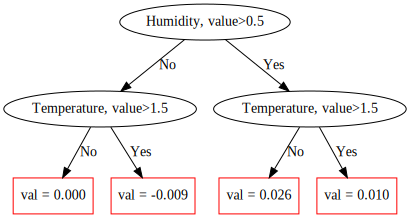

In [241]:
model = CatBoostClassifier(max_depth=9,
                 learning_rate=0.06454749016213018,
                 verbose=False,
                 max_ctr_complexity=1,
                 iterations=2).fit(pool)

model.plot_tree(
    tree_idx=0,
    pool=pool
)

val = -0.010 (ค่าเป็นลบ):
- แนวโน้มเป็น negative class (class 0)
- ความเชื่อมั่นต่ำ (ค่าใกล้ 0)

val = 0.000:
- ไม่สามารถระบุ class ได้ชัดเจน
- มีความไม่แน่นอนสูง

val = 0.026 (ค่าเป็นบวก):
- แนวโน้มเป็น positive class (class 1)
- ความเชื่อมั่นปานกลาง

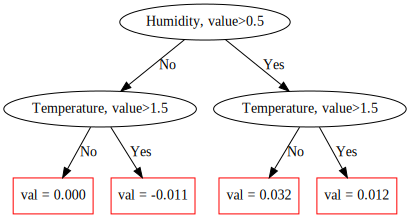

In [242]:
model = CatBoostClassifier(max_depth=5,
                 learning_rate=0.0792681476866447,
                 verbose=False,
                 max_ctr_complexity=1,
                 iterations=2).fit(pool)

model.plot_tree(
    tree_idx=0,
    pool=pool
)

In [243]:
accuracy = random_search_cb.score(X_test_cat, y_test_cat)
print(f"Model Accuracy: {accuracy:.4f}")

y_pred_cat = random_search_cb.predict(X_test_cat)

print("\nClassification Report:")
print(classification_report(y_test_cat, y_pred_cat))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_cat, y_pred_cat))

prob_predictions = random_search_cb.predict_proba(X_test_cat)
print("\nProbability Predictions (first 5 samples):")
print(prob_predictions[:5])

Model Accuracy: 0.6000

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5


Confusion Matrix:
[[1 1]
 [1 2]]

Probability Predictions (first 5 samples):
[[0.03239612 0.96760388]
 [0.890686   0.109314  ]
 [0.89984938 0.10015062]
 [0.06612979 0.93387021]
 [0.08552936 0.91447064]]


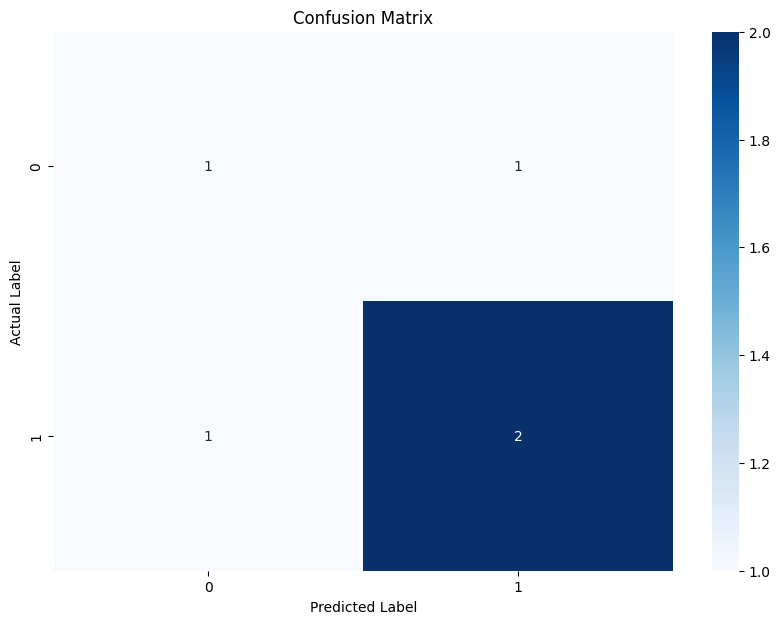

In [244]:
cm = confusion_matrix(y_test_cat, y_pred_cat)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()